In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from pandas.plotting import radviz, parallel_coordinates

In [2]:
import pandas as pd
import random

# Define policies and their corresponding benefits
policies_benefits = {
    "Basic Liability Coverage": [
        "Provides coverage for medical expenses for you and your passengers.",
        "Includes coverage for custom parts and equipment.",
        "Provides accident forgiveness for your first accident.",
        "Covers damages to other vehicles in an accident.",
        "Offers roadside assistance for emergencies."
    ],
    "Comprehensive Coverage": [
        "Provides accident forgiveness for your first accident.",
        "Covers theft or damage to your vehicle from non-collision incidents.",
        "Offers roadside assistance for emergencies.",
        "Covers damages to other vehicles in an accident.",
        "Includes rental car reimbursement while your car is being repaired."
    ],
    "Collision Coverage": [
        "Offers roadside assistance for emergencies.",
        "Offers discounts for safe driving.",
        "Covers damage to your vehicle from a collision with another vehicle or object.",
        "Includes coverage for custom parts and equipment.",
        "Covers damages to other vehicles in an accident."
    ],
    "Full Coverage": [
        "Offers roadside assistance for emergencies.",
        "Provides accident forgiveness for your first accident.",
        "Offers discounts for safe driving.",
        "Covers theft or damage to your vehicle from non-collision incidents.",
        "Includes coverage for custom parts and equipment."
    ],
    "Personal Injury Protection": [
        "Covers theft or damage to your vehicle from non-collision incidents.",
        "Provides accident forgiveness for your first accident.",
        "Includes rental car reimbursement while your car is being repaired.",
        "Covers damage to your vehicle from a collision with another vehicle or object.",
        "Covers damages to other vehicles in an accident."
    ]
}

# Load the existing CSV file
df = pd.read_csv('carclaims.csv')

# Add a new column for Policy, randomly selecting a policy for each row
df['Policy'] = [random.choice(list(policies_benefits.keys())) for _ in range(len(df))]

# Add columns for benefits (Benefit1, Benefit2, Benefit3, Benefit4, Benefit5)
df['Benefit1'] = df['Policy'].apply(lambda x: policies_benefits[x][0])
df['Benefit2'] = df['Policy'].apply(lambda x: policies_benefits[x][1])
df['Benefit3'] = df['Policy'].apply(lambda x: policies_benefits[x][2])
df['Benefit4'] = df['Policy'].apply(lambda x: policies_benefits[x][3])
df['Benefit5'] = df['Policy'].apply(lambda x: policies_benefits[x][4])

# Save the updated DataFrame to a new CSV file
df.to_csv('carclaims_updated.csv', index=False)

print("The file has been updated and saved as 'carclaims_updated.csv'.")

The file has been updated and saved as 'carclaims_updated.csv'.


In [3]:
file_path = os.path.join(os.getcwd(), "", "carclaims_updated.csv")
csv_data = pd.read_csv(file_path)

In [4]:
print(csv_data.columns)

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'FraudFound', 'Policy', 'Benefit1', 'Benefit2',
       'Benefit3', 'Benefit4', 'Benefit5'],
      dtype='object')


In [5]:
# Display basic info
print("\n🔹 Dataset Info:")
print(csv_data.info())

# Display first 5 rows
print("\n🔹 First 5 Rows:")
print(csv_data.head())

# Check for missing values
print("\n🔹 Missing Values Count:")
print(csv_data.isnull().sum())


🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber       

In [6]:
#check duplications
csv_data.duplicated().sum()

0

In [7]:
# Summary statistics
print("\n🔹 Summary Statistics:")
print(csv_data.describe())


🔹 Summary Statistics:
        WeekOfMonth  WeekOfMonthClaimed           Age  PolicyNumber  \
count  15420.000000        15420.000000  15420.000000  15420.000000   
mean       2.788586            2.693969     39.855707   7710.500000   
std        1.287585            1.259115     13.492377   4451.514911   
min        1.000000            1.000000      0.000000      1.000000   
25%        2.000000            2.000000     31.000000   3855.750000   
50%        3.000000            3.000000     38.000000   7710.500000   
75%        4.000000            4.000000     48.000000  11565.250000   
max        5.000000            5.000000     80.000000  15420.000000   

          RepNumber    Deductible  DriverRating          Year  
count  15420.000000  15420.000000  15420.000000  15420.000000  
mean       8.483268    407.704280      2.487808   1994.866472  
std        4.599948     43.950998      1.119453      0.803313  
min        1.000000    300.000000      1.000000   1994.000000  
25%        5.0000

In [8]:
# Loop through each column and display the unique values
for column in csv_data.columns:
    print(f"Unique values in {column}:")
    print(csv_data[column].unique())
    print("\n" + "="*50 + "\n")

Unique values in Month:
['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']


Unique values in WeekOfMonth:
[5 3 2 4 1]


Unique values in DayOfWeek:
['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']


Unique values in Make:
['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']


Unique values in AccidentArea:
['Urban' 'Rural']


Unique values in DayOfWeekClaimed:
['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']


Unique values in MonthClaimed:
['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']


Unique values in WeekOfMonthClaimed:
[1 4 2 3 5]


Unique values in Sex:
['Female' 'Male']


Unique values in MaritalStatus:
['Single' 'Married' 'Widow' 'Divorced']


Unique values in Age:
[21 34 47 65 27 20 36  0 30 42 71 52 28 61 38 41 32 40 63 31 45 60 39 55
 35 44 72 29 37 59 49

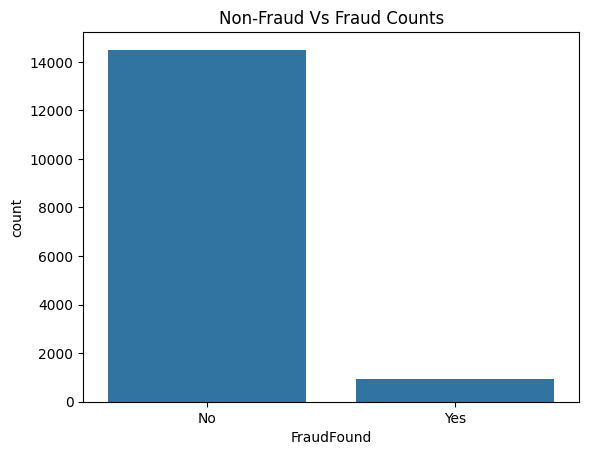

In [9]:
#check Volume of each classes
sns.countplot(x=csv_data['FraudFound'])
plt.title("Non-Fraud Vs Fraud Counts")
plt.show()

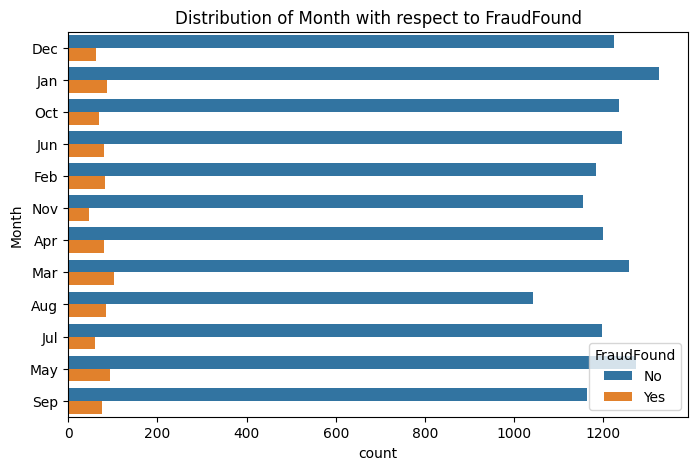

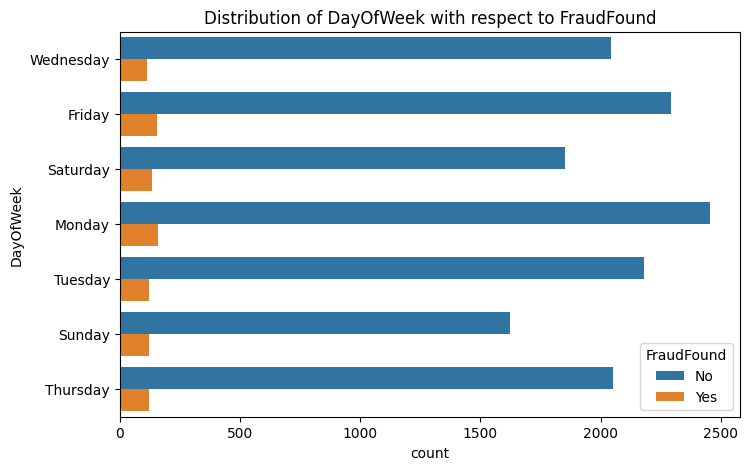

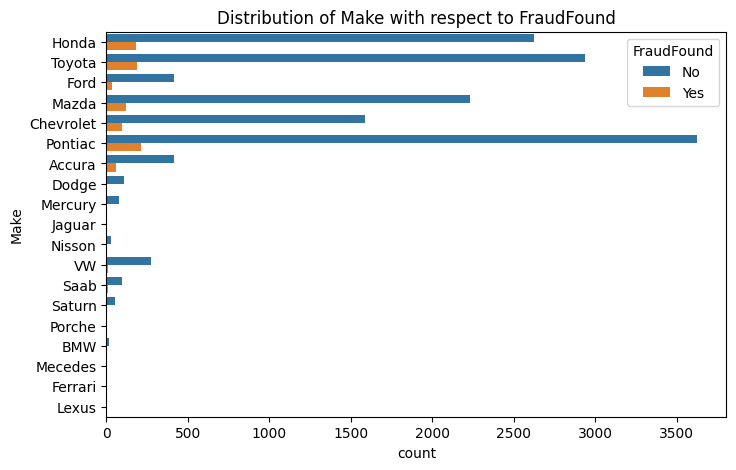

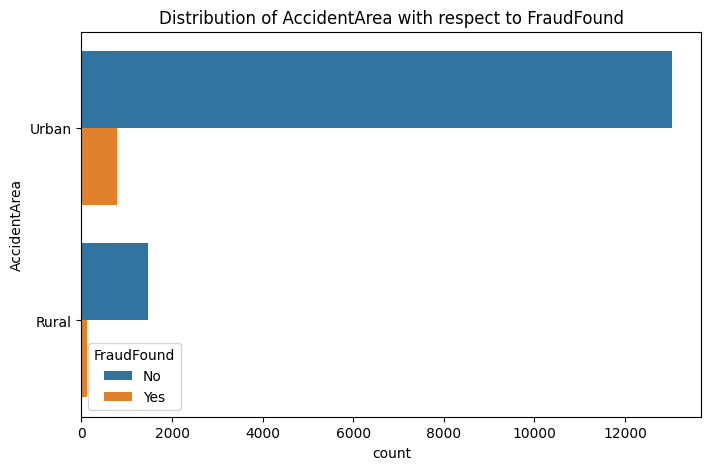

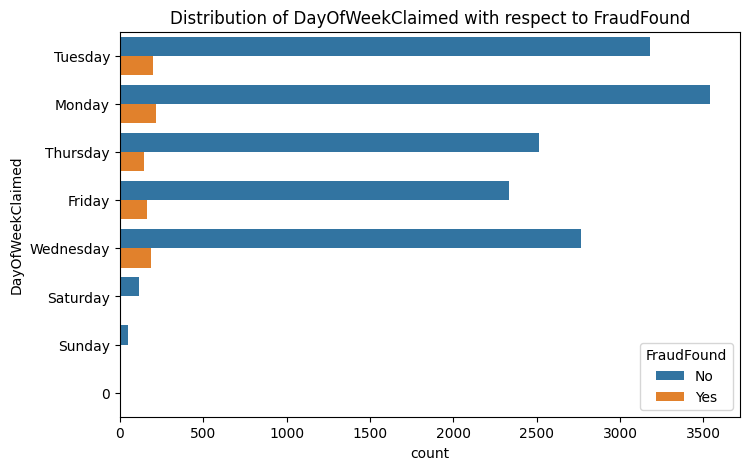

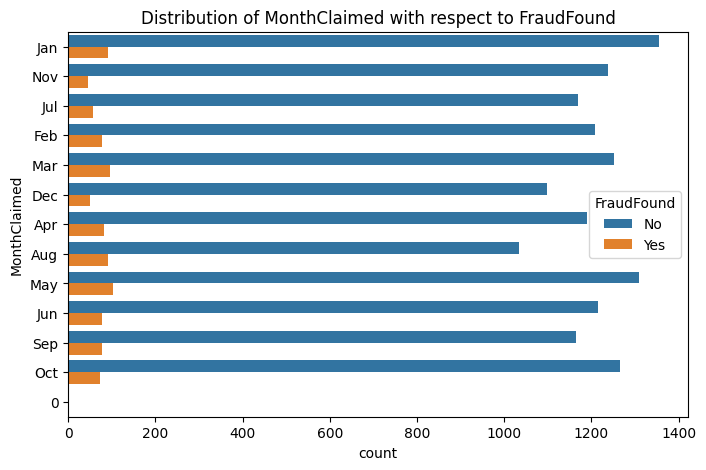

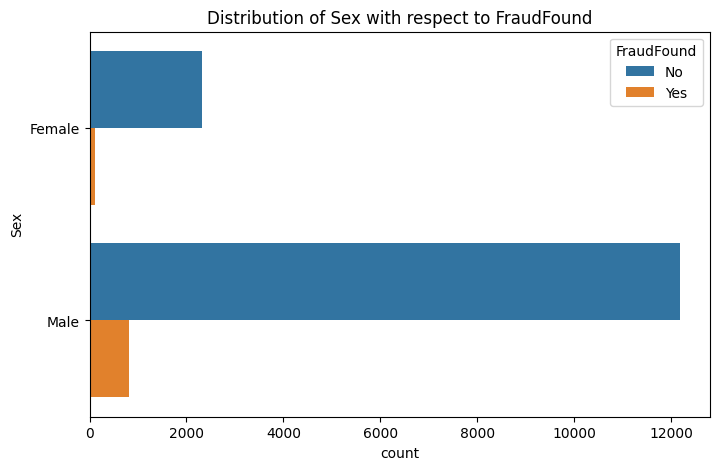

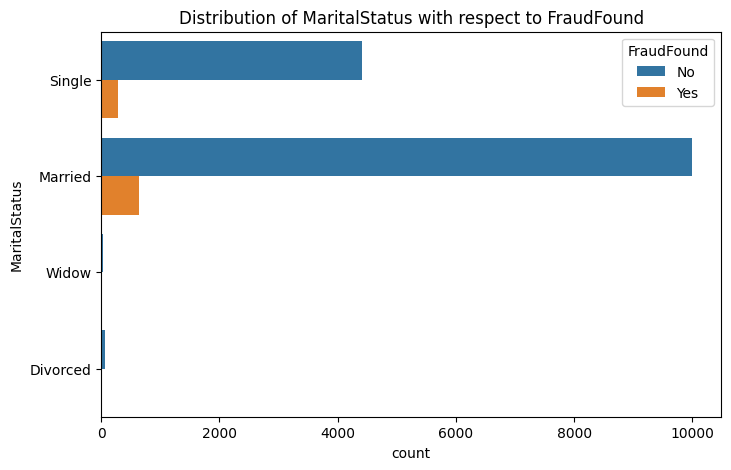

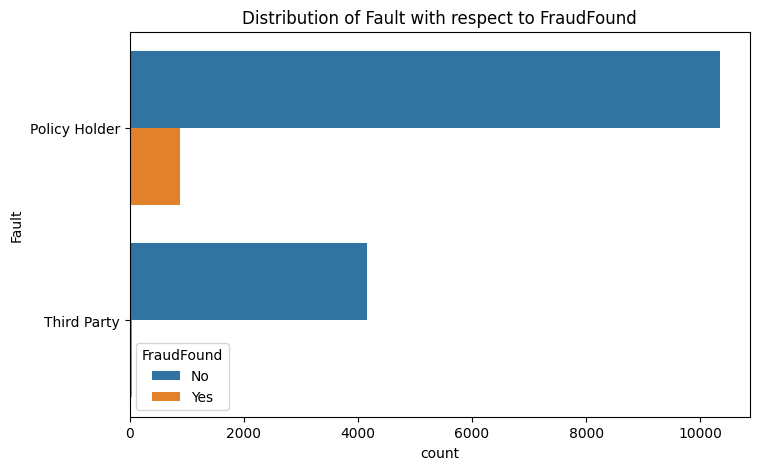

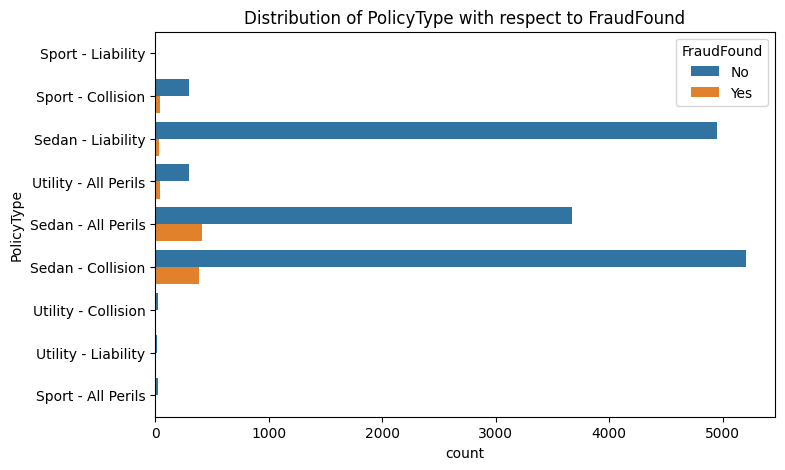

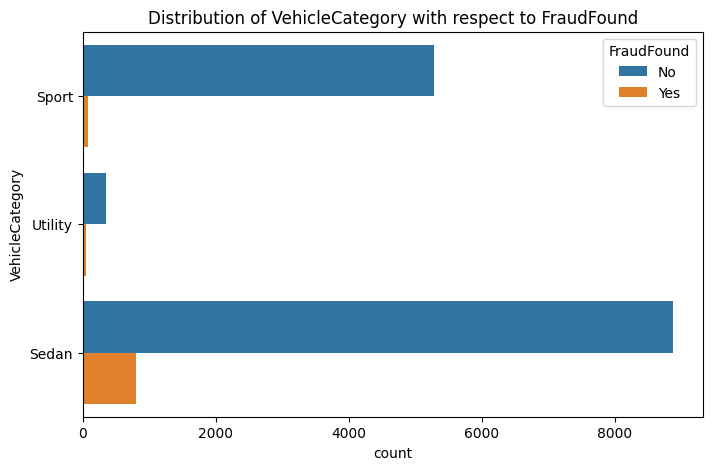

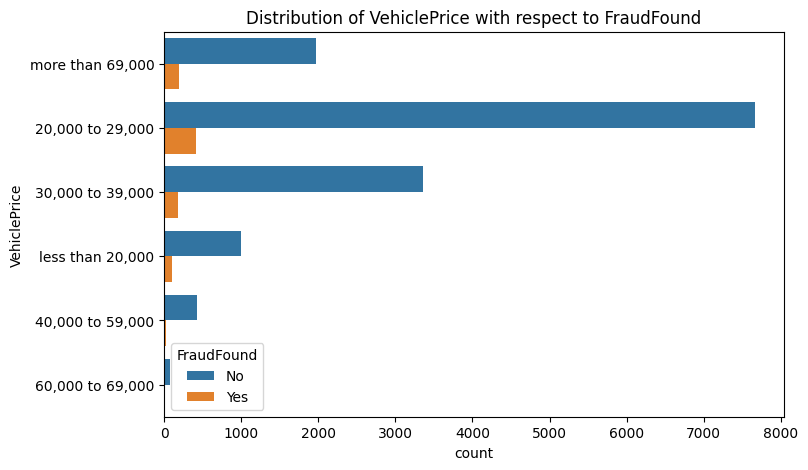

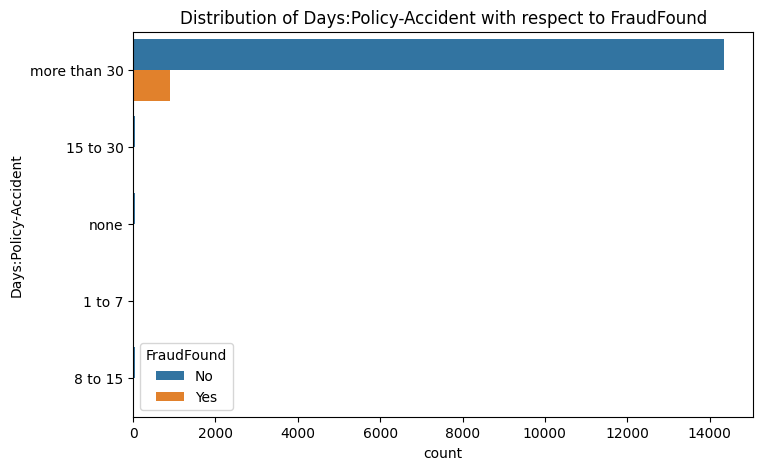

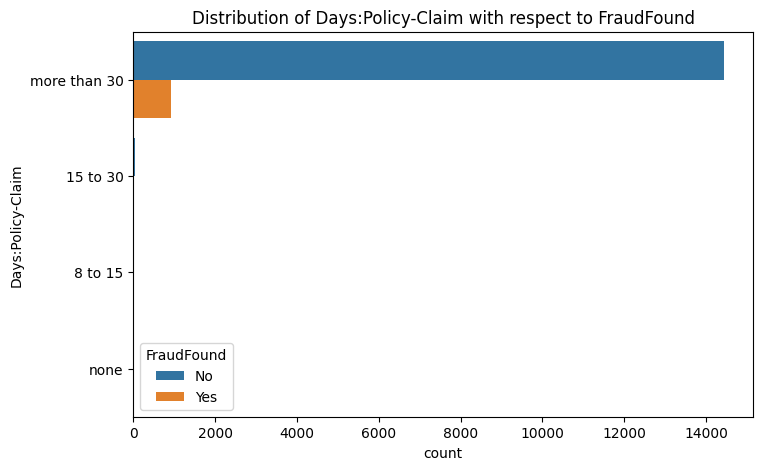

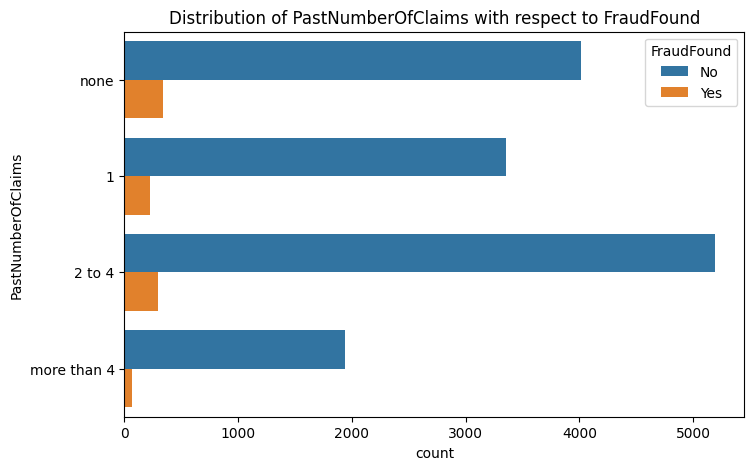

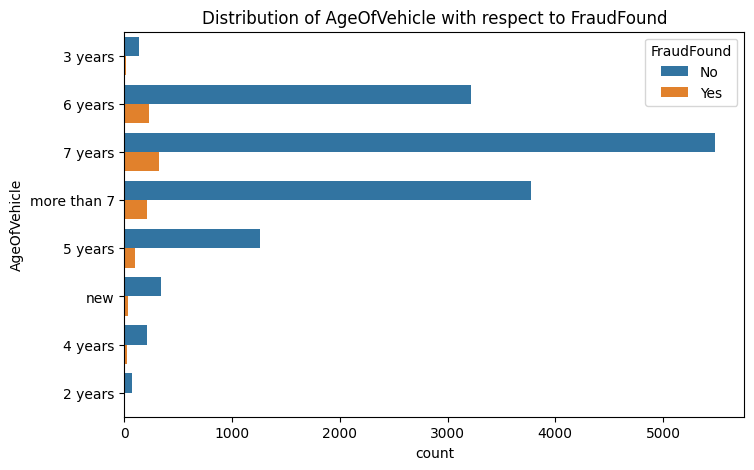

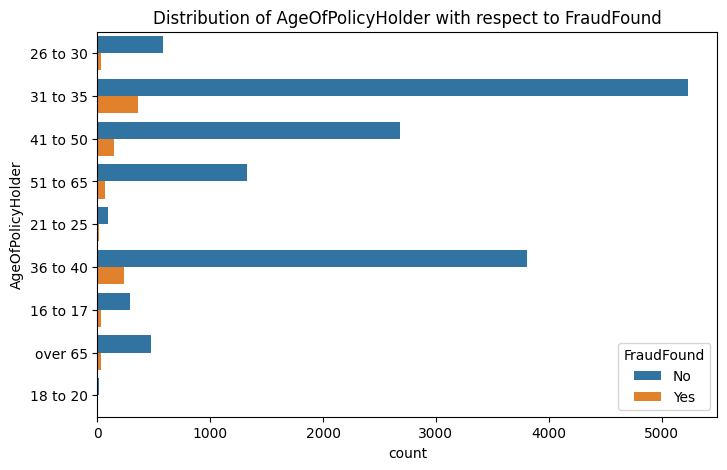

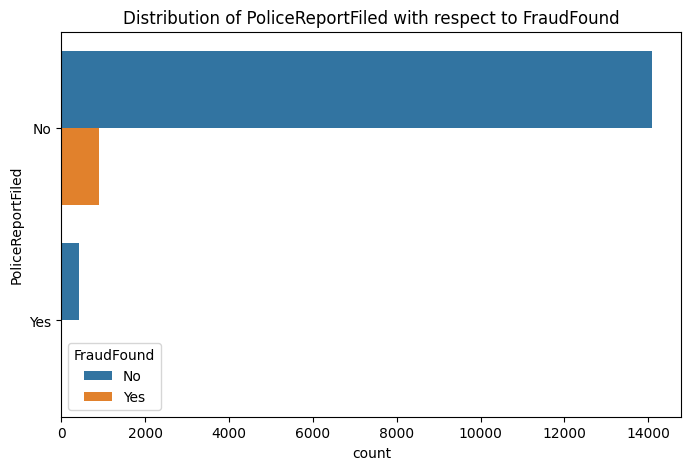

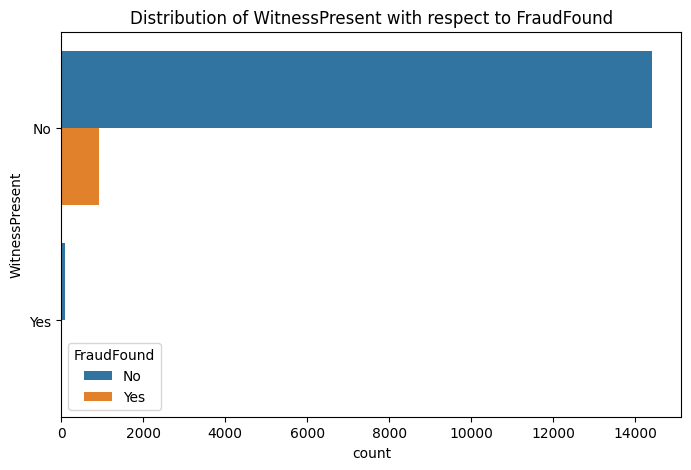

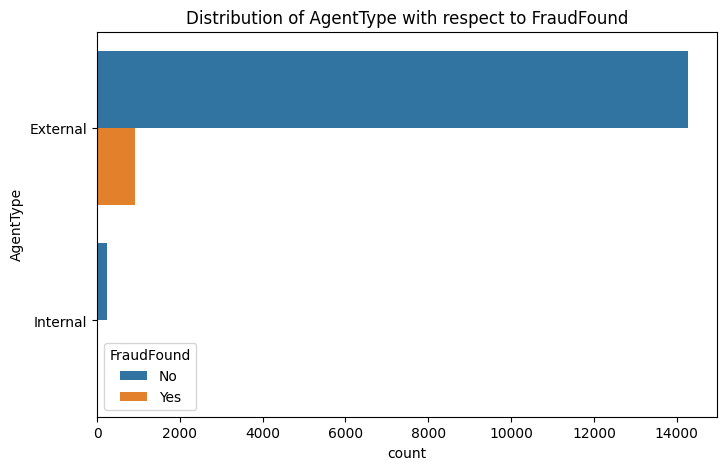

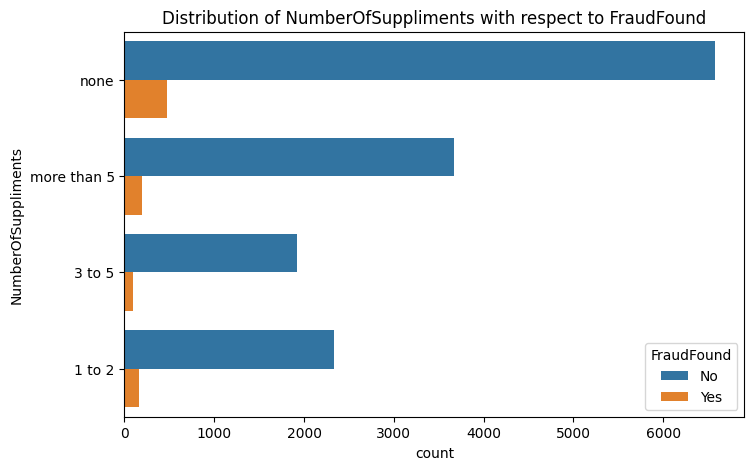

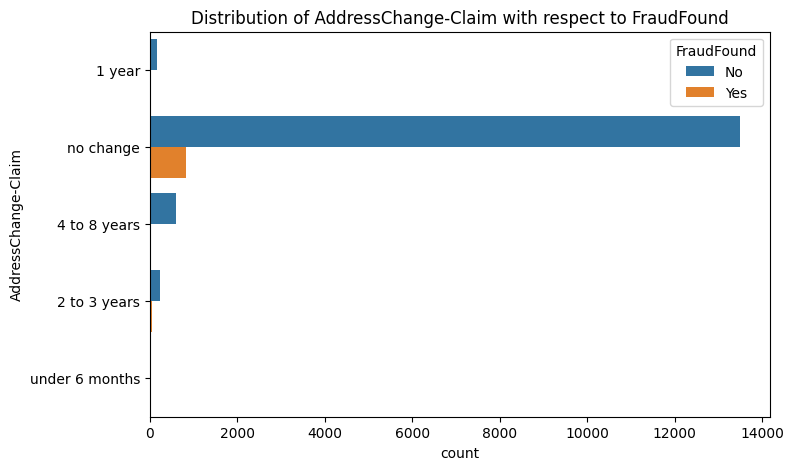

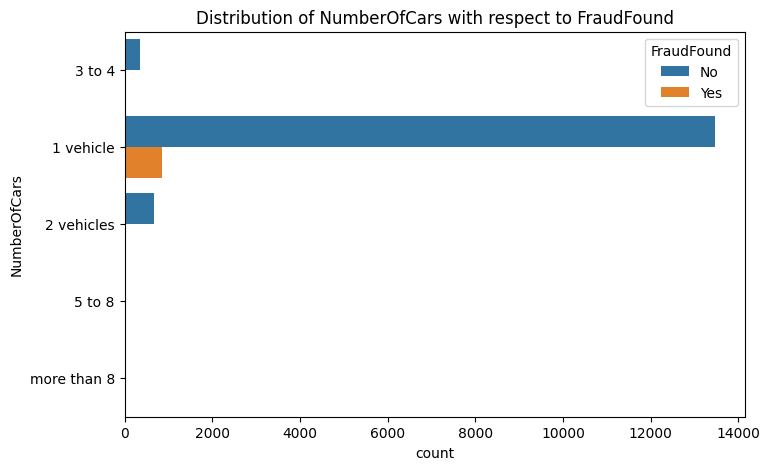

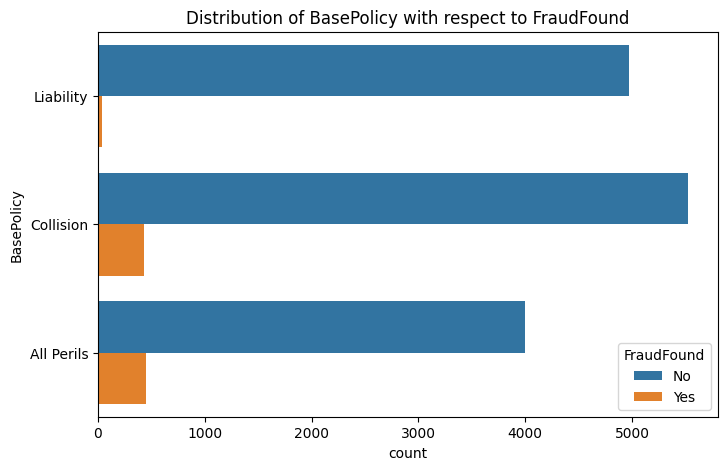

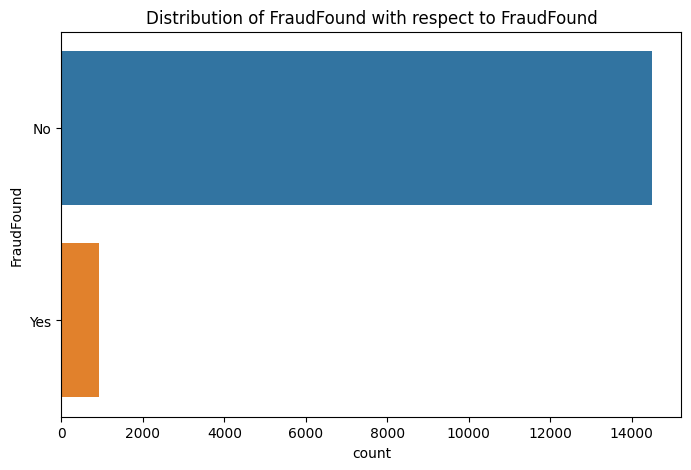

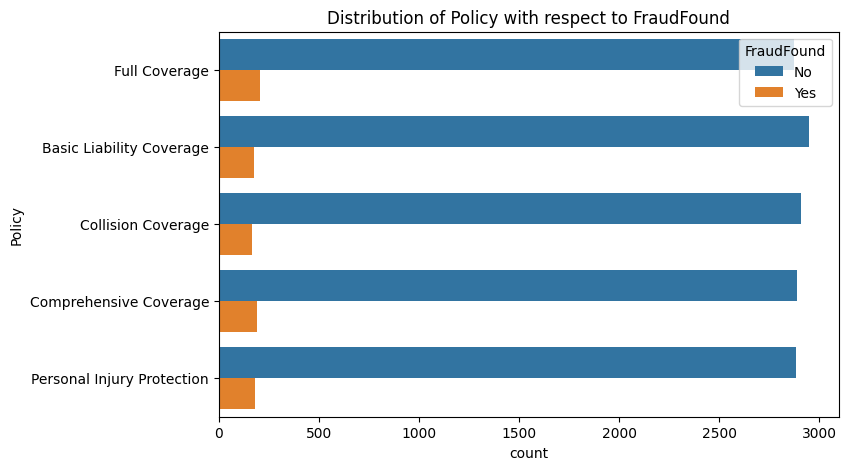

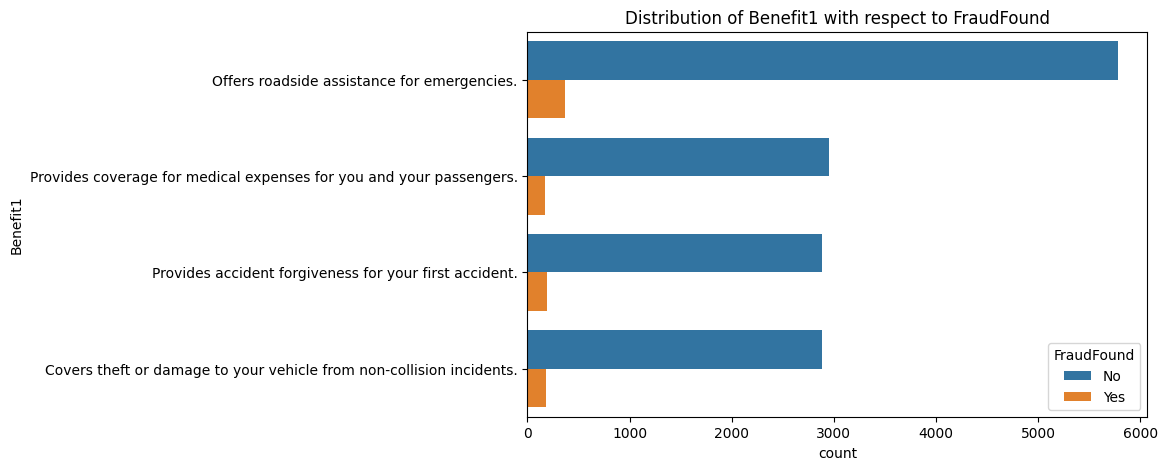

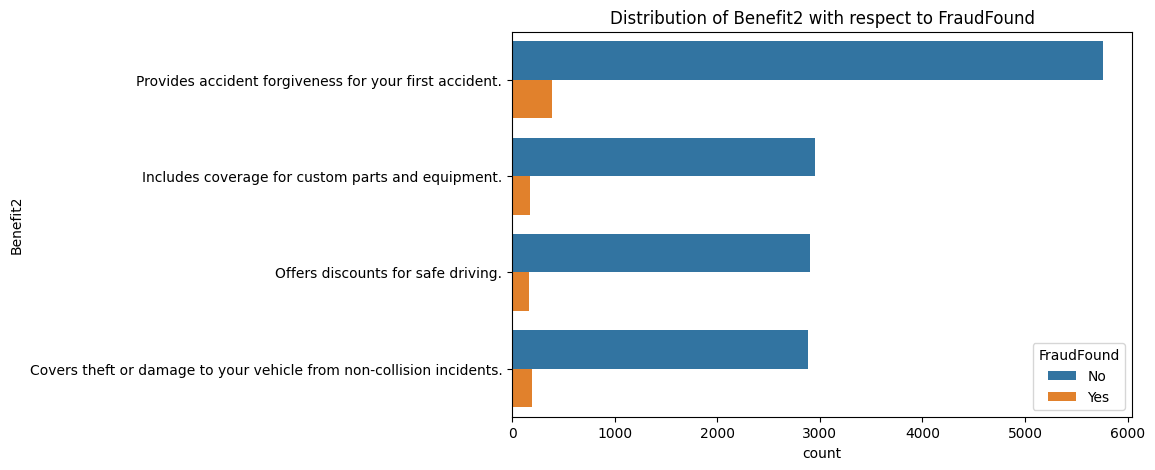

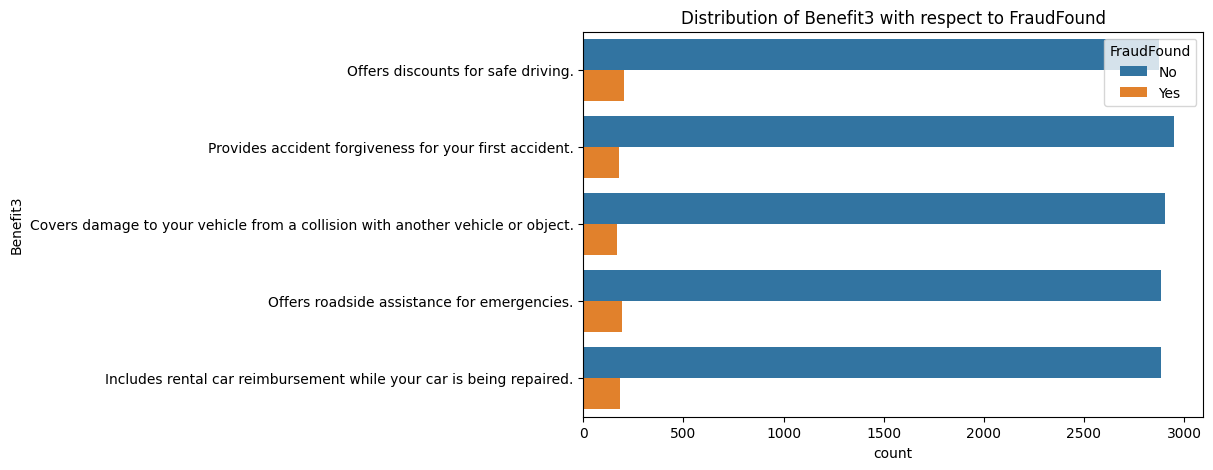

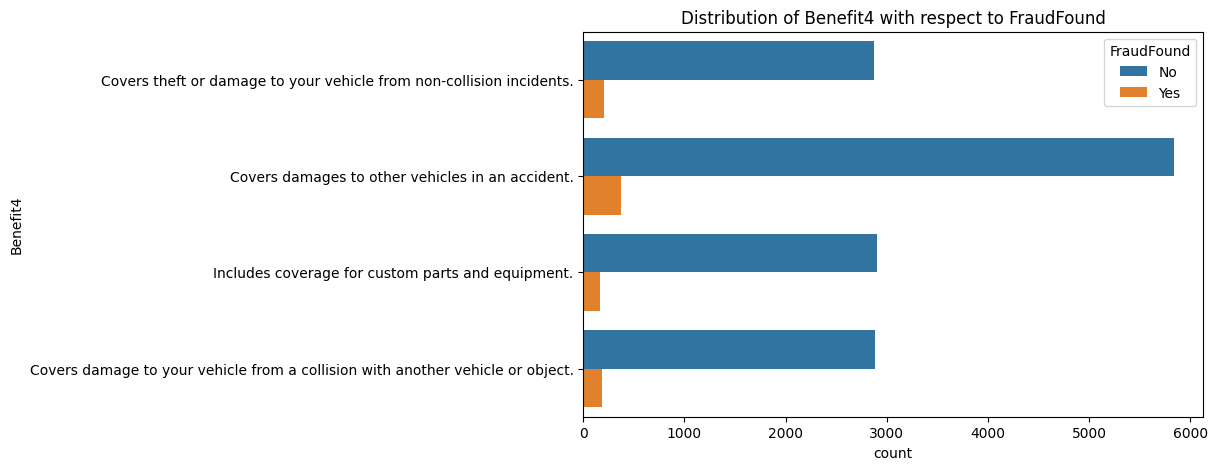

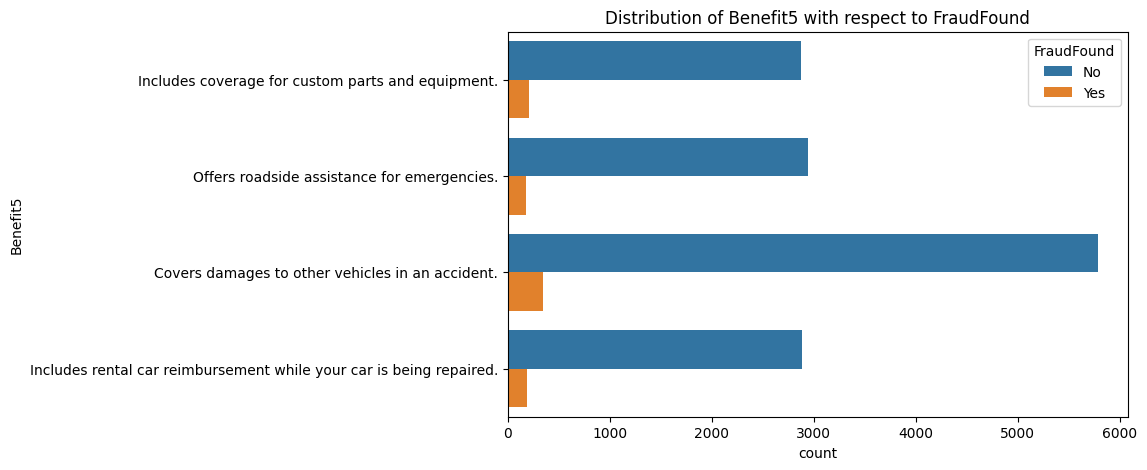

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols = csv_data.select_dtypes(include=['object', 'category']).columns

# Loop through each categorical column and plot
for col in categorical_cols:
    plt.figure(figsize=(8, 5))  # Adjust the size if necessary
    sns.countplot(data=csv_data, y=col, hue='FraudFound')
    plt.title(f'Distribution of {col} with respect to FraudFound')
    plt.show()

### Derived Relations

Claim Frequency by Age Group and Fault Type

In [11]:
csv_data['AgeGroup'] = pd.cut(csv_data['Age'], bins=[0, 18, 25, 35, 45, 55, 65, 100], 
                               labels=['0-18', '18-25', '25-35', '35-45', '45-55', '55-65', '65+'])

C:\Users\aksha\AppData\Local\Temp\ipykernel_11984\1729590114.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  claim_frequency = csv_data.groupby(['AgeGroup', 'Fault']).size().reset_index(name='ClaimCount')
C:\Users\aksha\AppData\Local\Temp\ipykernel_11984\1729590114.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=claim_frequency, x='AgeGroup', y='ClaimCount', hue='Fault', ci=None)


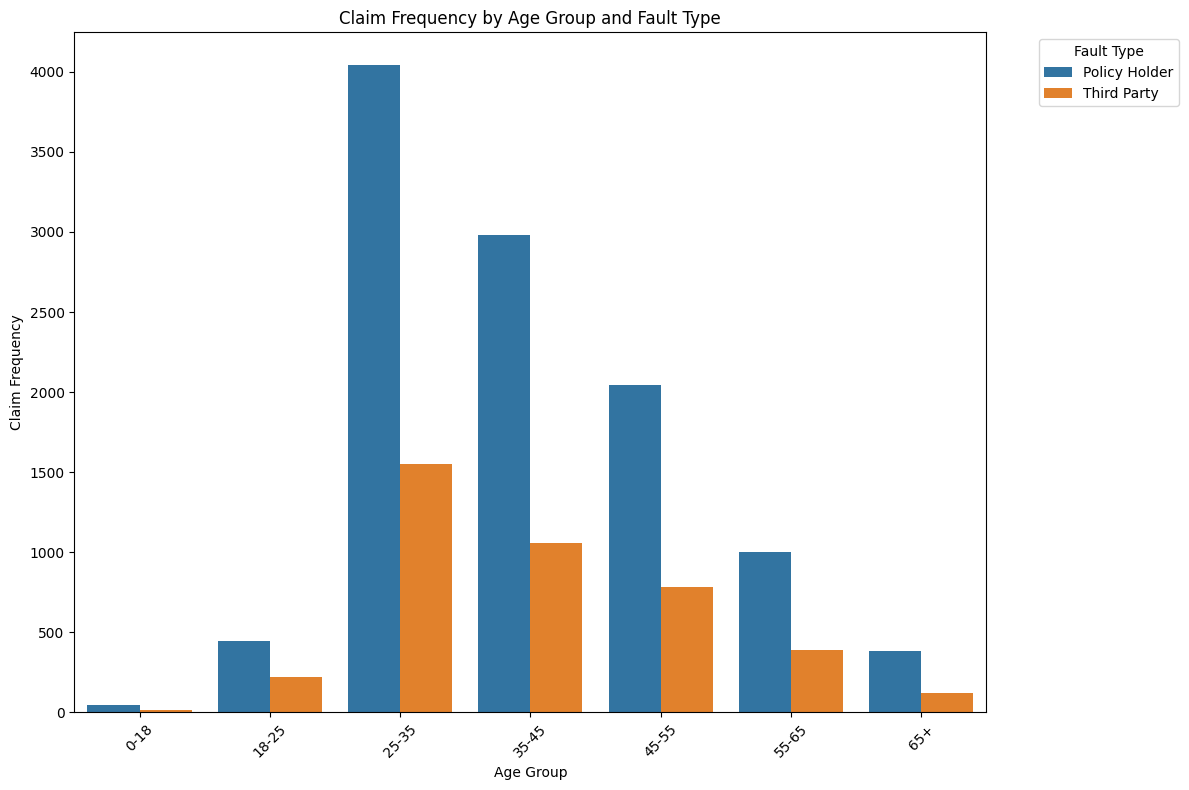

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by AgeGroup and Fault to calculate claim frequency
claim_frequency = csv_data.groupby(['AgeGroup', 'Fault']).size().reset_index(name='ClaimCount')

# Plot a stacked bar plot for claim frequency by AgeGroup and Fault Type
plt.figure(figsize=(12, 8))
sns.barplot(data=claim_frequency, x='AgeGroup', y='ClaimCount', hue='Fault', ci=None)

# Customize the plot
plt.title('Claim Frequency by Age Group and Fault Type')
plt.xlabel('Age Group')
plt.ylabel('Claim Frequency')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend(title='Fault Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

C:\Users\aksha\AppData\Local\Temp\ipykernel_11984\874964696.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  claim_frequency = csv_data.groupby(['AgeGroup', 'Fault']).size().reset_index(name='ClaimCount')
C:\Users\aksha\AppData\Local\Temp\ipykernel_11984\874964696.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivoted_claim_frequency = claim_frequency.pivot_table(index='AgeGroup', columns='Fault', values='ClaimCount', aggfunc='sum', fill_value=0)


<Figure size 1200x800 with 0 Axes>

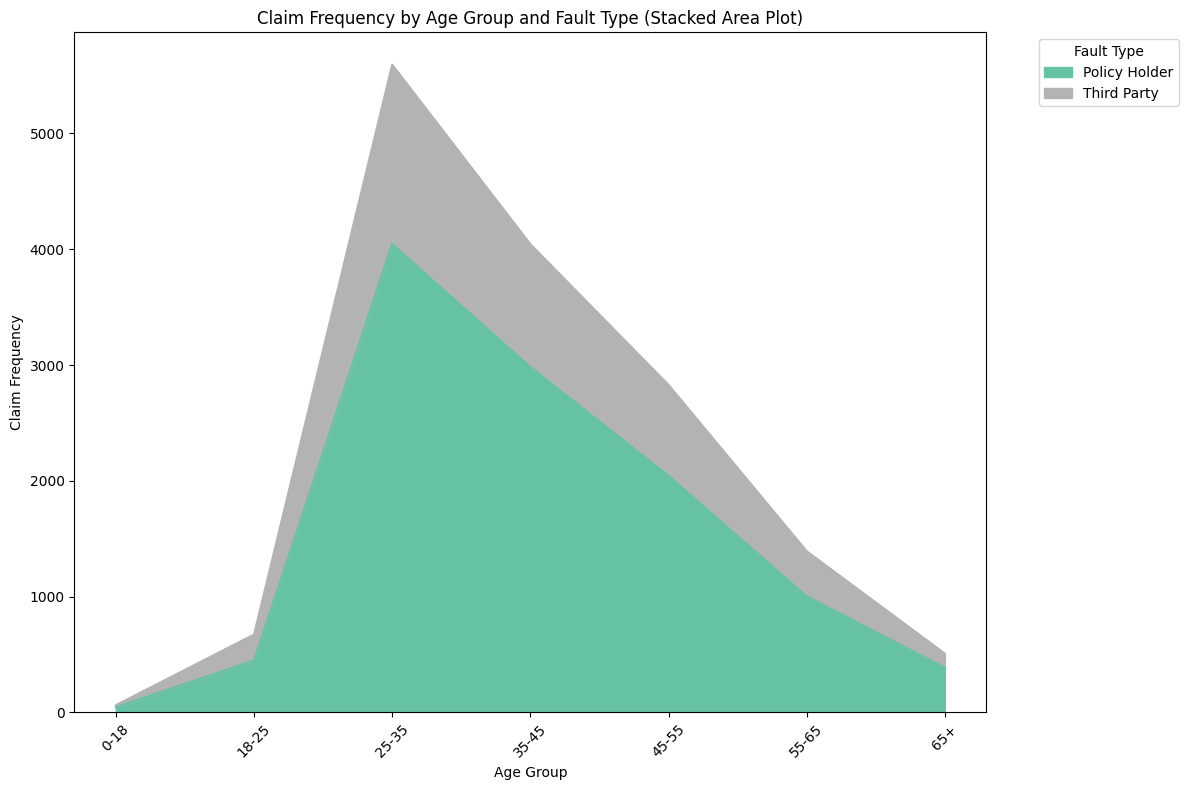

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by AgeGroup and Fault to calculate claim frequency
claim_frequency = csv_data.groupby(['AgeGroup', 'Fault']).size().reset_index(name='ClaimCount')

# Pivot the data to have Fault types as columns
pivoted_claim_frequency = claim_frequency.pivot_table(index='AgeGroup', columns='Fault', values='ClaimCount', aggfunc='sum', fill_value=0)

# Plot a stacked area plot
plt.figure(figsize=(12, 8))
pivoted_claim_frequency.plot.area(stacked=True, figsize=(12, 8), colormap='Set2')

# Customize the plot
plt.title('Claim Frequency by Age Group and Fault Type (Stacked Area Plot)')
plt.xlabel('Age Group')
plt.ylabel('Claim Frequency')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend(title='Fault Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


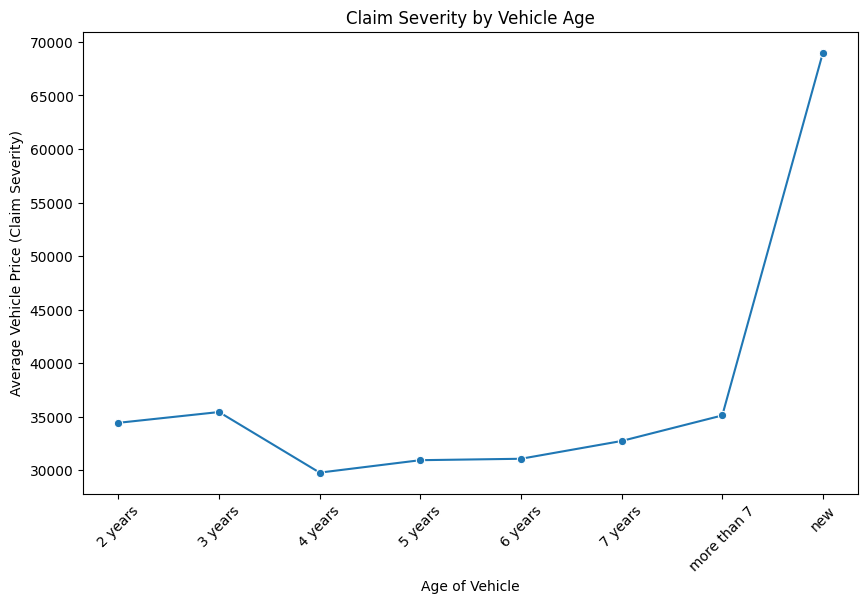

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to convert the vehicle price range into a numeric value
def convert_to_numeric(price_range):
    # Strip spaces and handle different price ranges
    price_range = str(price_range).strip().lower()

    # Handle cases like 'more than 69,000' by extracting the numeric part
    if 'more than' in price_range:
        return 69000  # Treat 'more than 69,000' as 69,000
    elif 'less than' in price_range:
        return 20000  # Treat 'less than 20,000' as 20,000
    elif 'to' in price_range:
        parts = price_range.split(' to ')
        return (int(parts[0].replace(',', '')) + int(parts[1].replace(',', ''))) / 2  # Take the average of the range
    else:
        return int(price_range.replace(',', ''))  # Convert directly if it's a single number

# Apply the function to convert 'VehiclePrice' to numeric
csv_data['VehiclePrice'] = csv_data['VehiclePrice'].apply(convert_to_numeric)

# Group by Vehicle Age and calculate average claim severity (VehiclePrice)
claim_severity = csv_data.groupby('AgeOfVehicle')['VehiclePrice'].mean().reset_index()

# Visualize the relationship using a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=claim_severity, x='AgeOfVehicle', y='VehiclePrice', marker='o')
plt.title('Claim Severity by Vehicle Age')
plt.ylabel('Average Vehicle Price (Claim Severity)')
plt.xlabel('Age of Vehicle')
plt.xticks(rotation=45)
plt.show()

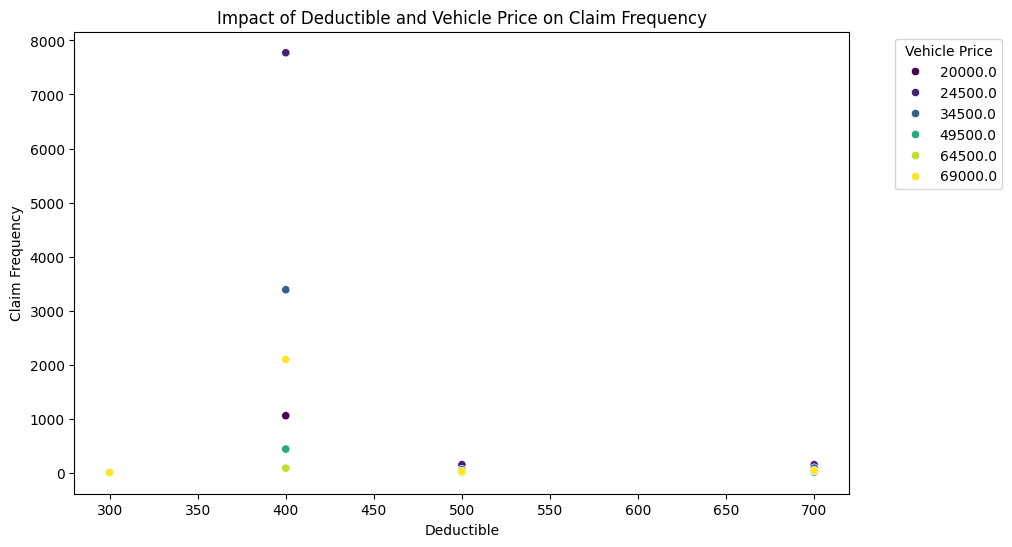

In [15]:
# Group by Deductible and Vehicle Price to calculate claim frequency
claim_impact = csv_data.groupby(['Deductible', 'VehiclePrice']).size().reset_index(name='ClaimCount')

# Visualize the result with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=claim_impact, x='Deductible', y='ClaimCount', hue='VehiclePrice', palette="viridis")
plt.title('Impact of Deductible and Vehicle Price on Claim Frequency')
plt.ylabel('Claim Frequency')
plt.xlabel('Deductible')
plt.legend(title='Vehicle Price', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Relationship Between Vehicle Age and Number of Past Claims

    AgeOfVehicle  AgeOfVehicleNumeric
0        3 years                    3
1        6 years                    6
2        7 years                    7
3    more than 7                    8
4        5 years                    5
7            new                    0
42       4 years                    4
121      2 years                    2


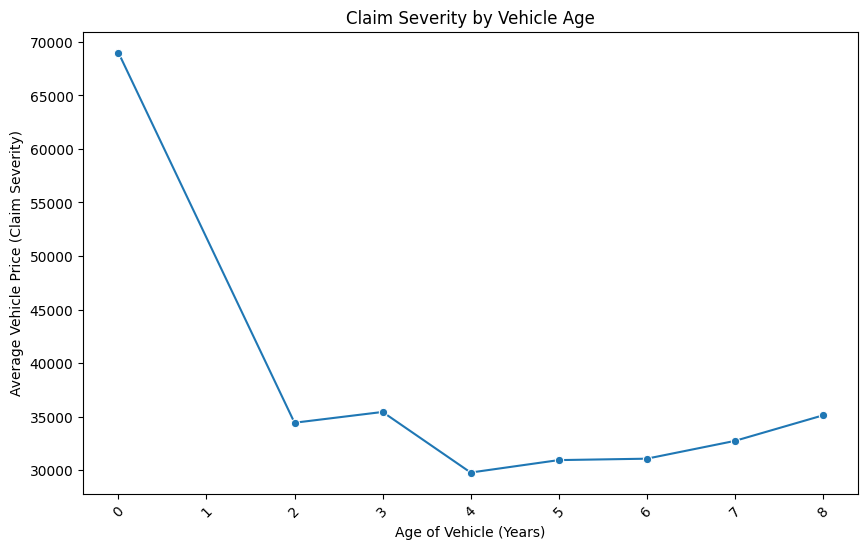

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to convert 'AgeOfVehicle' to numeric values
def convert_age_of_vehicle(age_str):
    # Strip spaces and handle different values
    age_str = str(age_str).strip().lower()

    # Handle cases like 'new' or 'more than'
    if age_str == 'new':
        return 0  # Treat 'new' as 0 years
    elif 'more than' in age_str:
        return 8  # Treat 'more than 7' as 8 years (or any value > 7)
    else:
        # Extract the numeric value from the age string (e.g., '3 years' -> 3)
        try:
            return int(age_str.split()[0])  # Split by space and take the first part
        except:
            return None  # In case of an invalid value

# Apply the function to convert 'AgeOfVehicle' to numeric
csv_data['AgeOfVehicleNumeric'] = csv_data['AgeOfVehicle'].apply(convert_age_of_vehicle)

# Check if the conversion worked
print(csv_data[['AgeOfVehicle', 'AgeOfVehicleNumeric']].drop_duplicates())

# Group by Vehicle Age (numeric) and calculate average claim severity (VehiclePrice)
claim_severity = csv_data.groupby('AgeOfVehicleNumeric')['VehiclePrice'].mean().reset_index()

# Visualize the relationship using a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=claim_severity, x='AgeOfVehicleNumeric', y='VehiclePrice', marker='o')
plt.title('Claim Severity by Vehicle Age')
plt.ylabel('Average Vehicle Price (Claim Severity)')
plt.xlabel('Age of Vehicle (Years)')
plt.xticks(rotation=45)
plt.show()


Apllying Mapping to Vehicle Price

In [17]:
price_mapping = {
    'less than 20,000': 'Low',
    '20,000 to 29,000': 'Medium',
    '30,000 to 39,000': 'Medium',
    '40,000 to 59,000': 'High',
    '60,000 to 69,000': 'High',
    'more than 69,000': 'Luxury'
}

# Apply the mapping to the 'VehiclePrice' column
csv_data['VehiclePriceCategory'] = csv_data['VehiclePrice'].map(price_mapping)

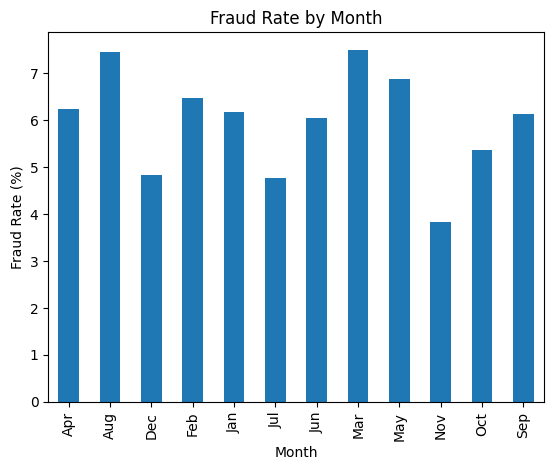

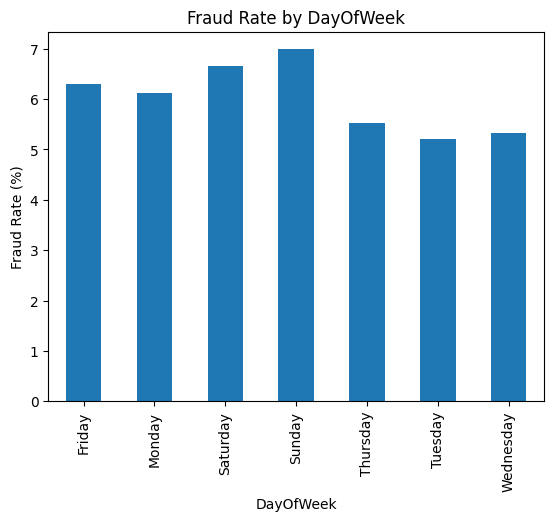

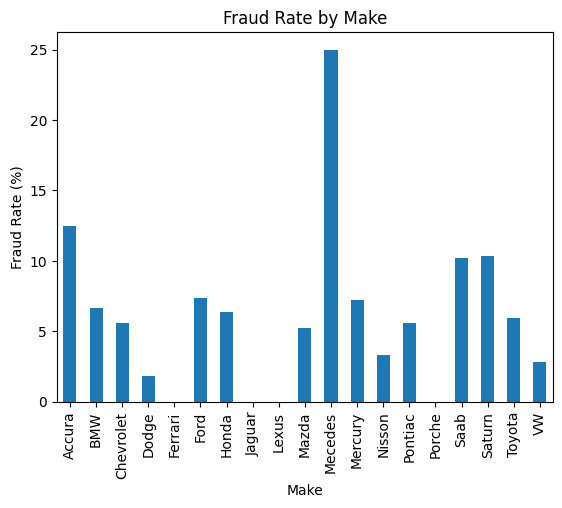

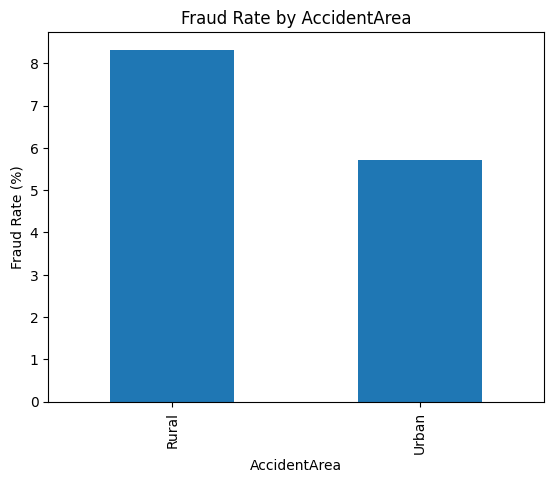

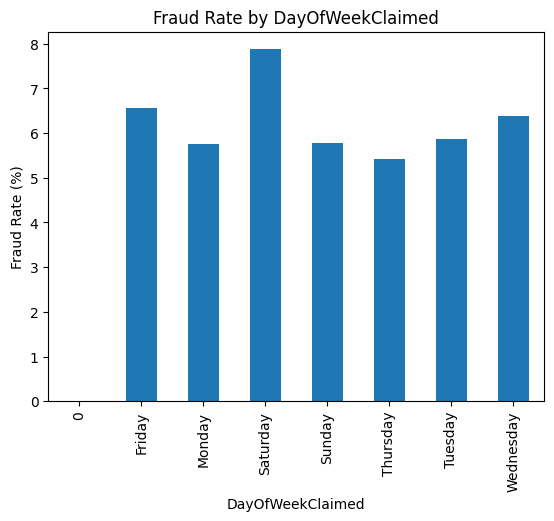

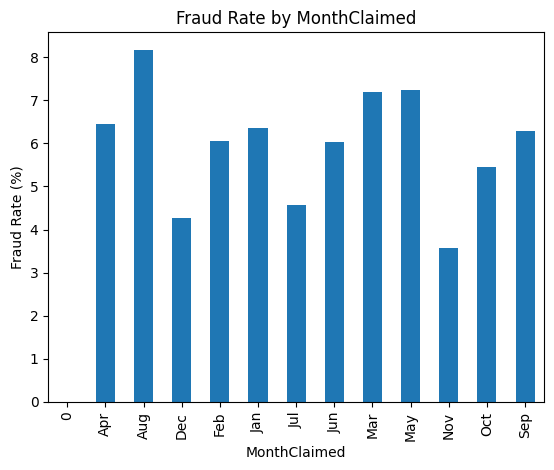

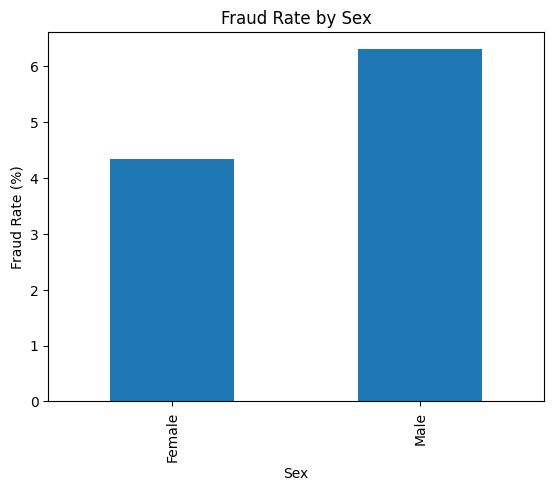

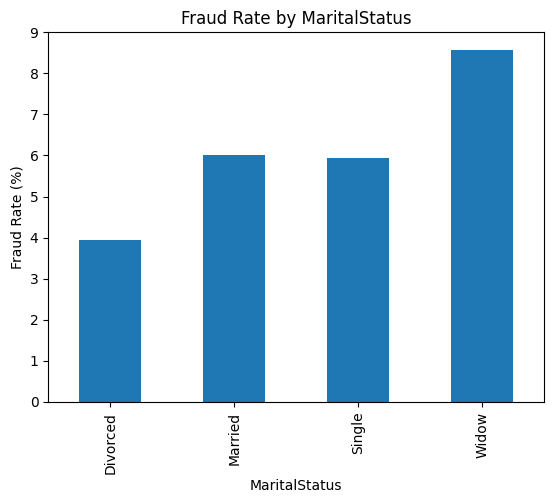

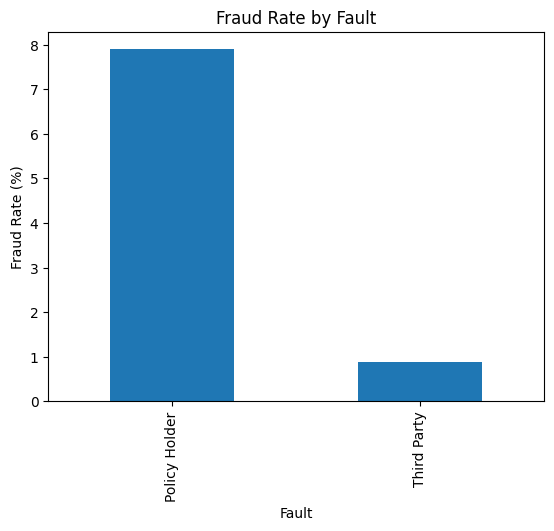

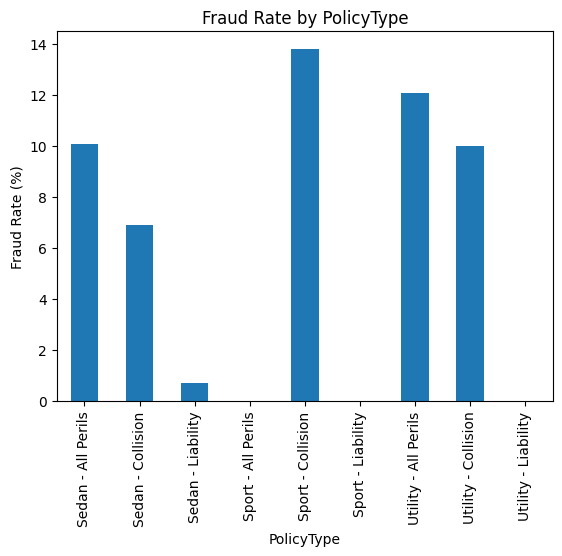

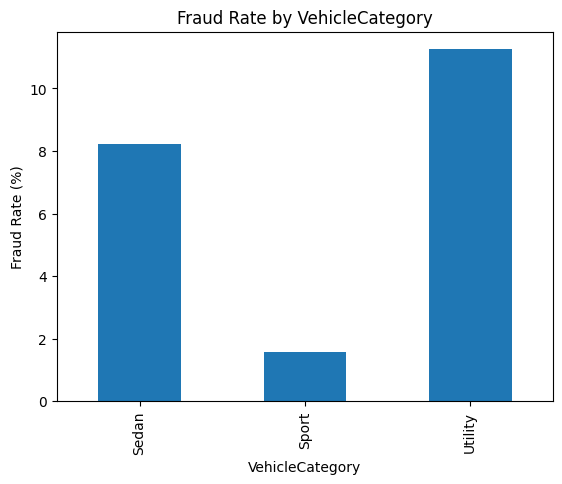

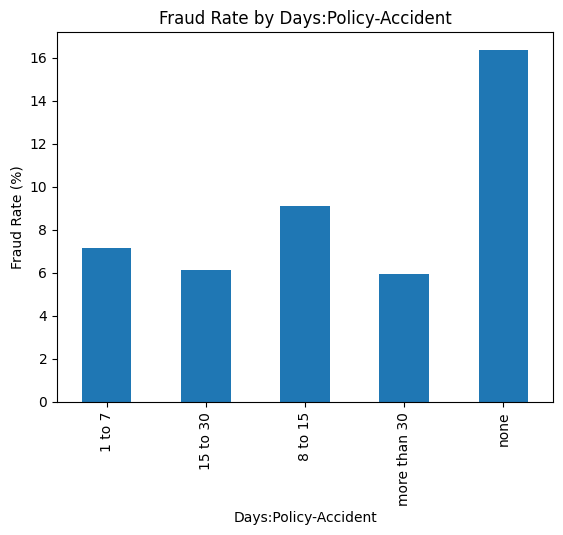

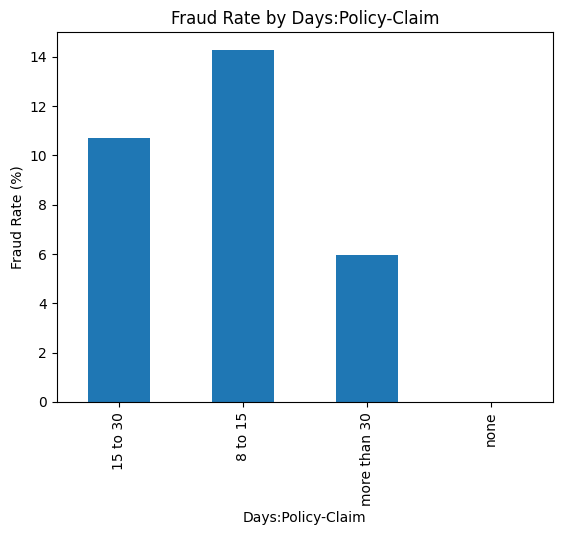

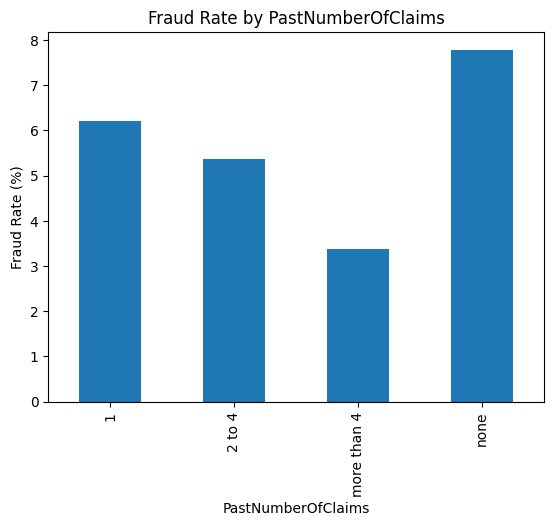

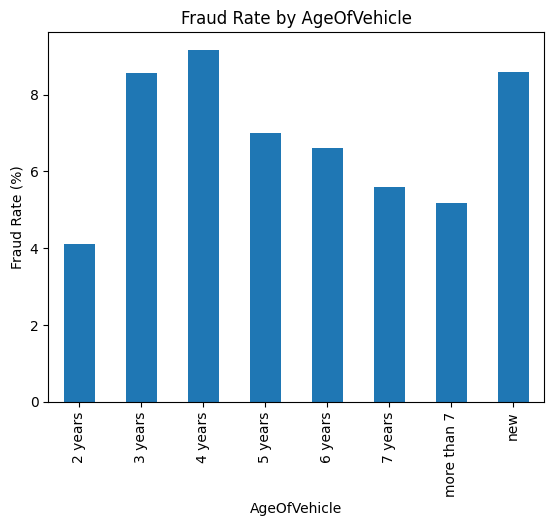

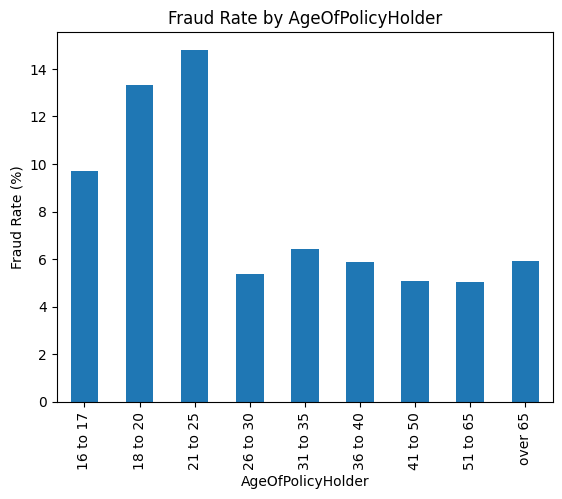

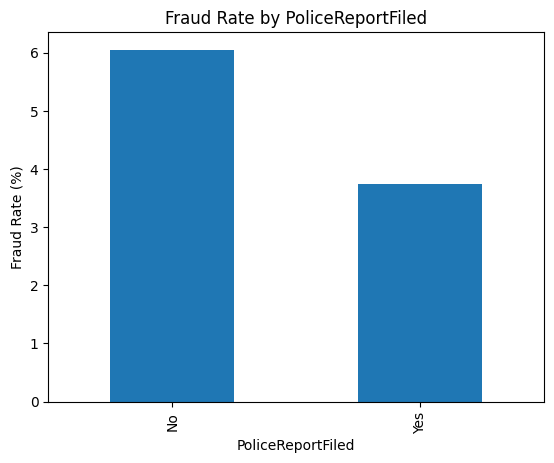

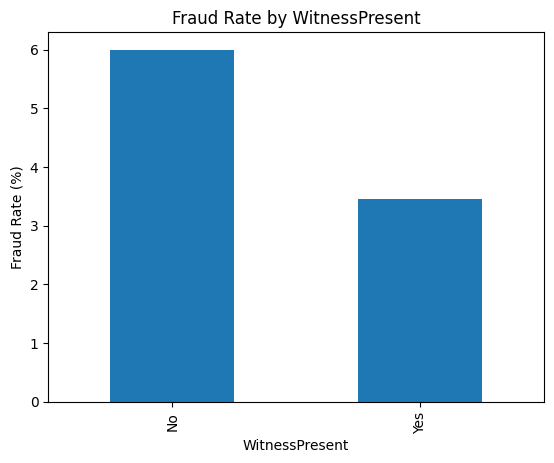

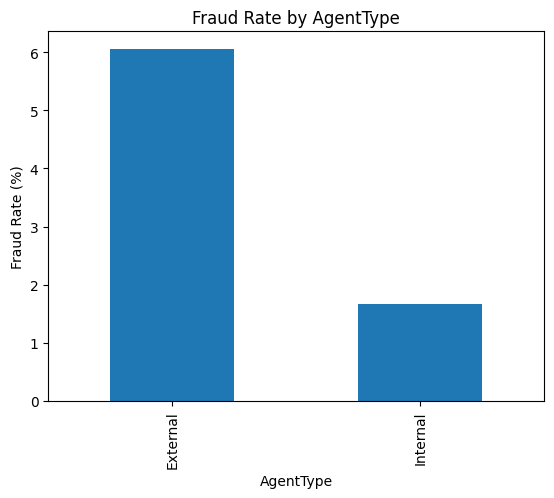

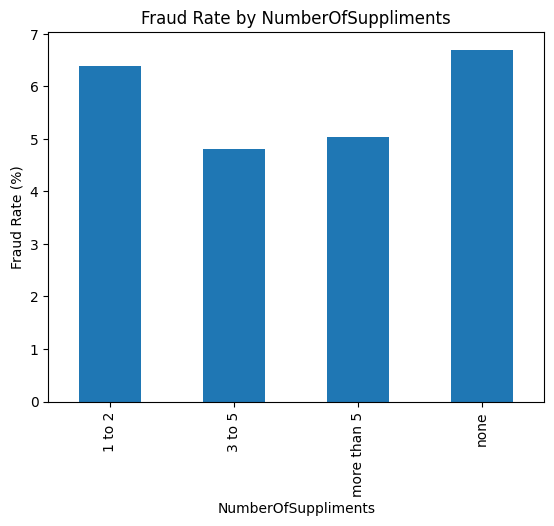

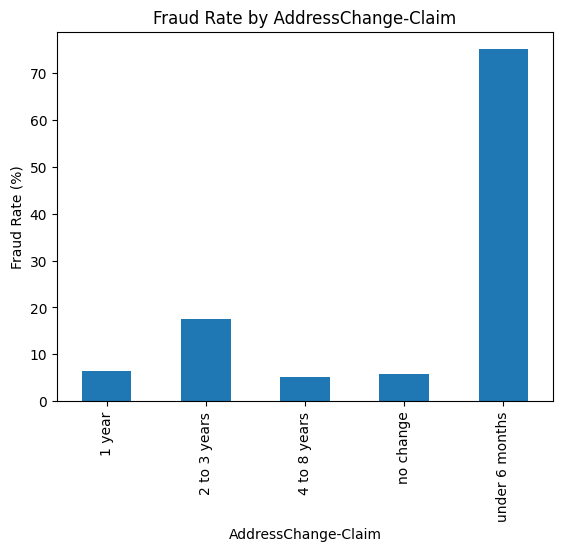

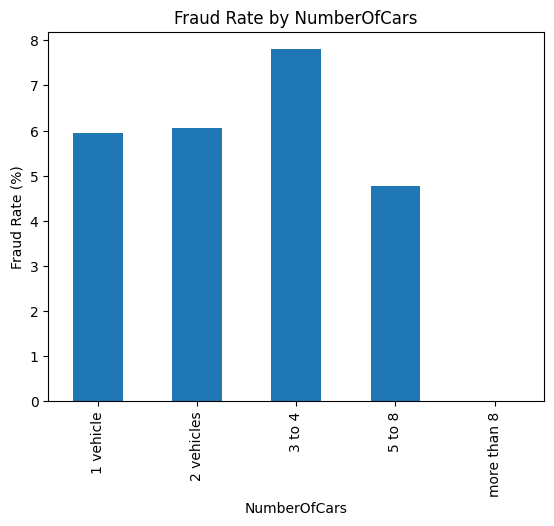

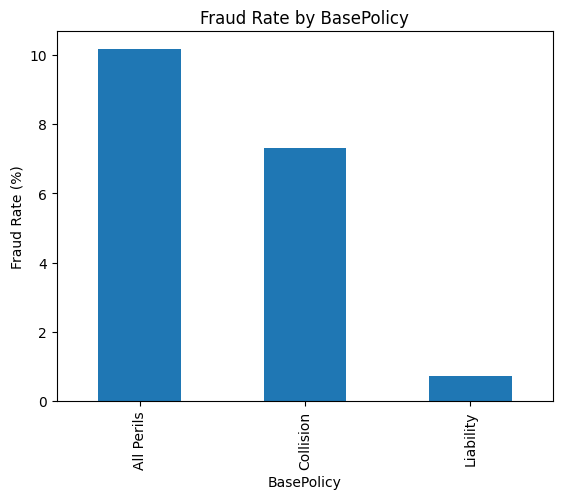

ValueError: index must be a MultiIndex to unstack, <class 'pandas.core.indexes.base.Index'> was passed

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate fraud rate for categorical columns
categorical_columns = csv_data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    fraud_rate_by_category = csv_data.groupby(col)['FraudFound'].value_counts(normalize=True).unstack().iloc[:,1] * 100
    fraud_rate_by_category.plot(kind='bar', title=f'Fraud Rate by {col}')
    plt.ylabel('Fraud Rate (%)')
    plt.xlabel(col)
    plt.show()

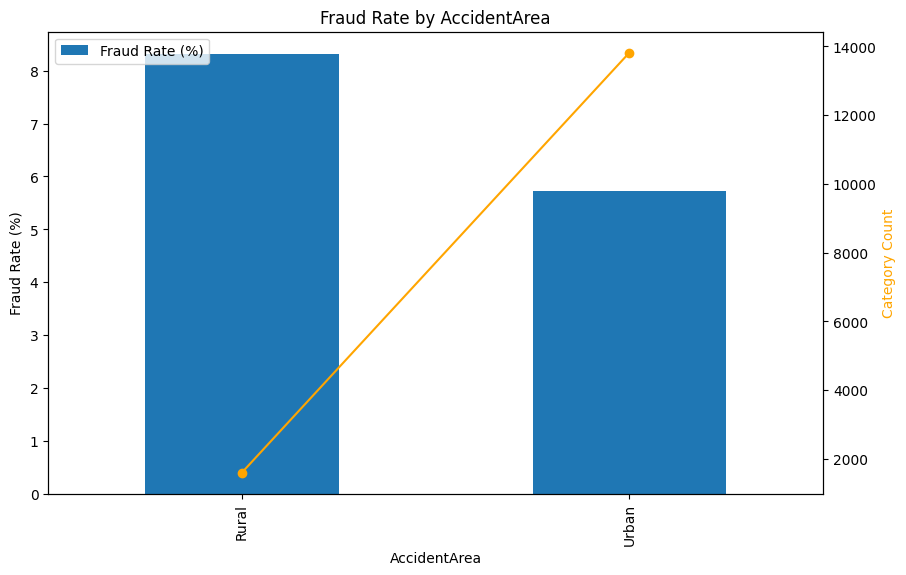

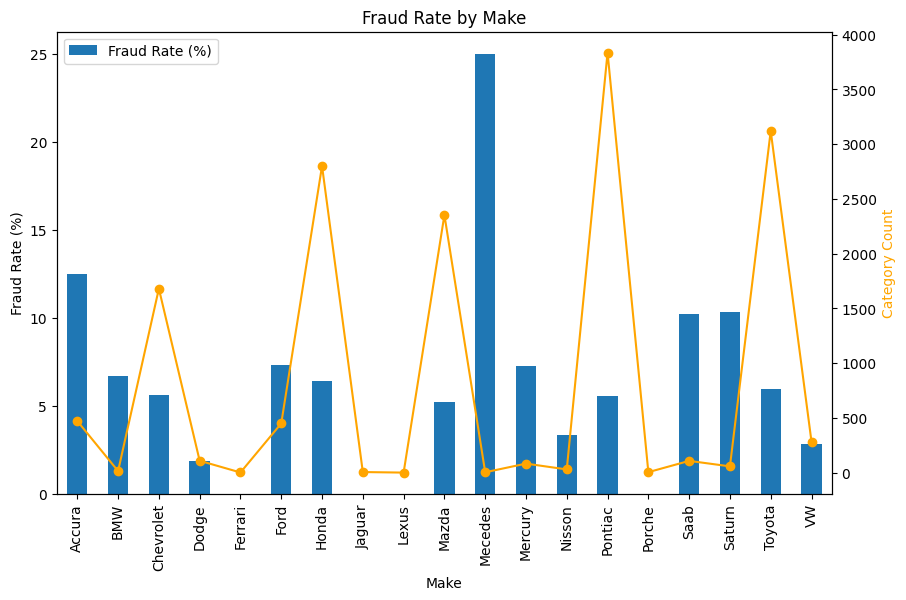

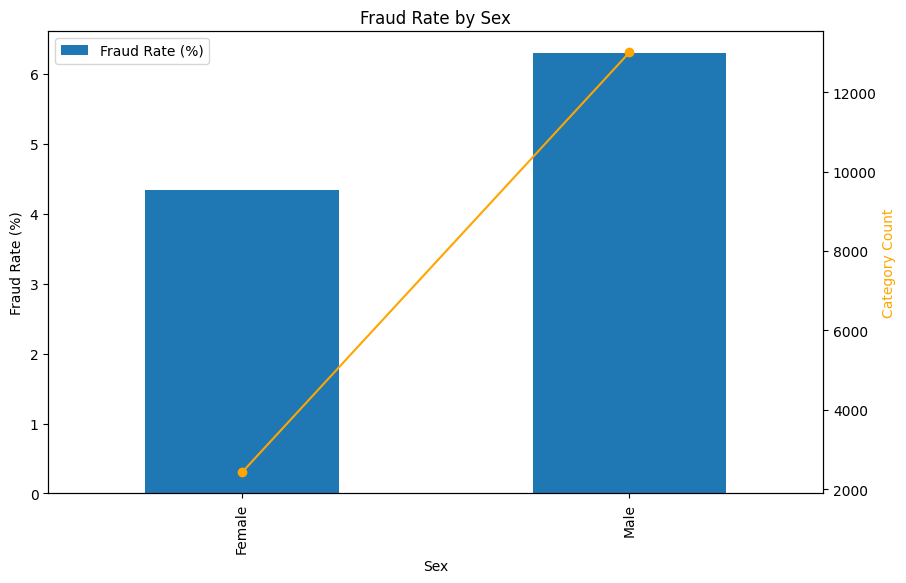

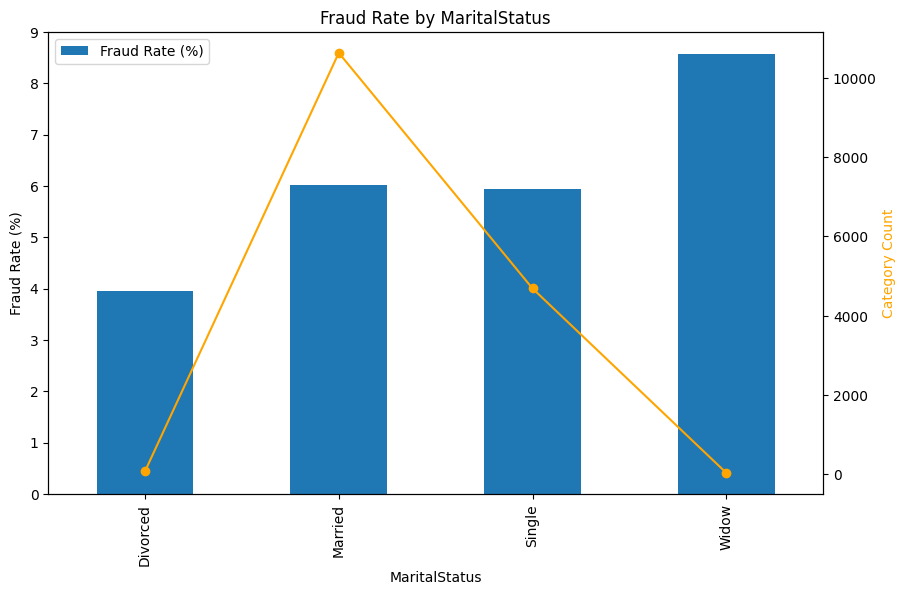

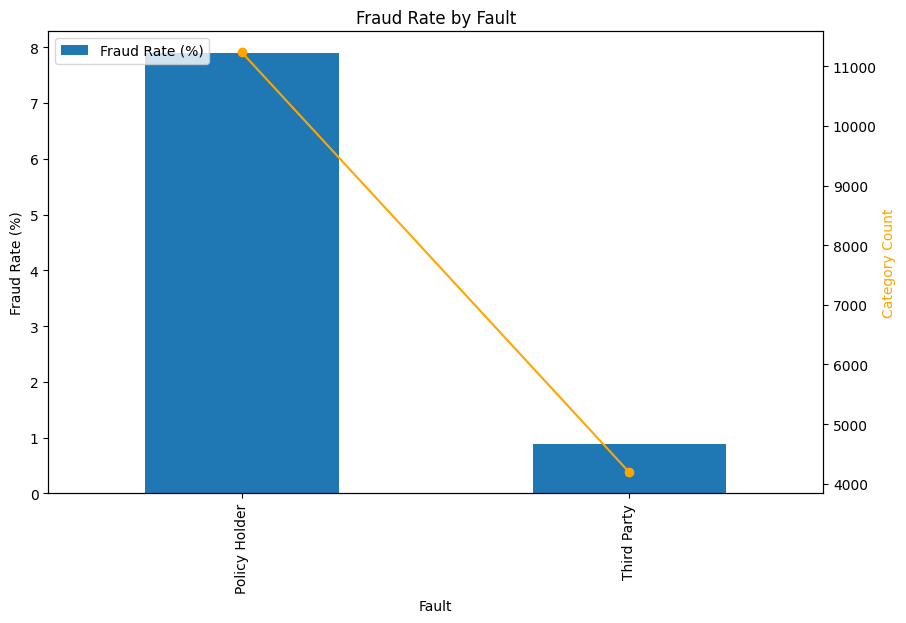

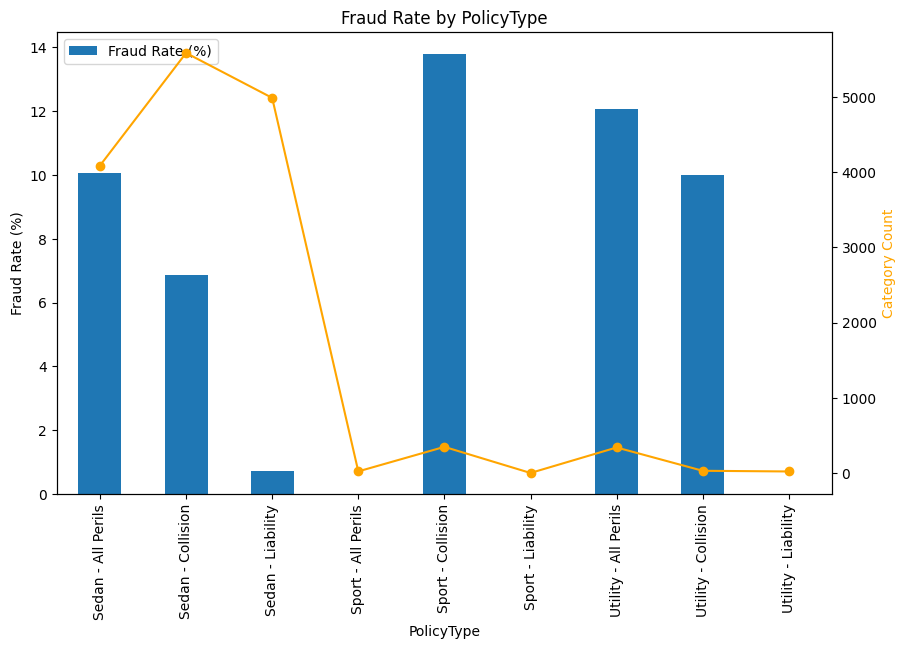

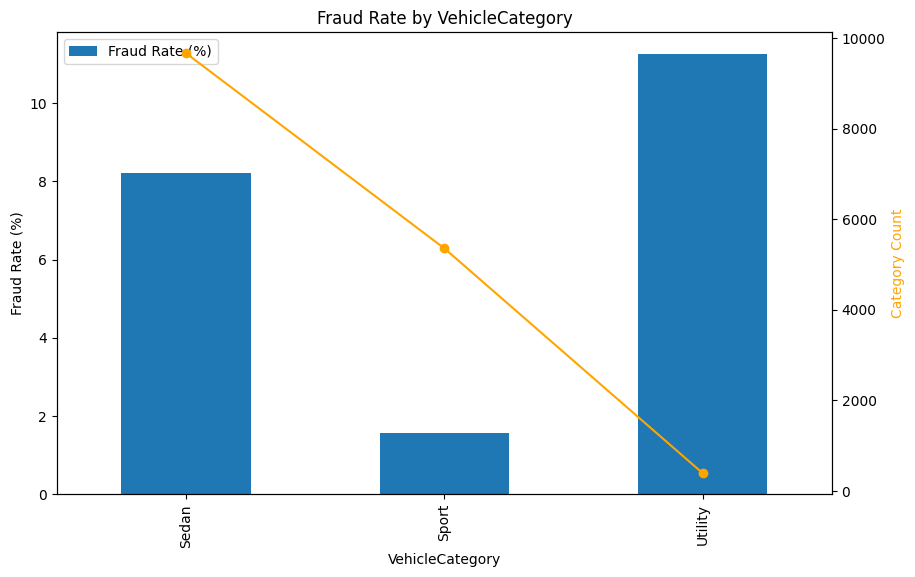

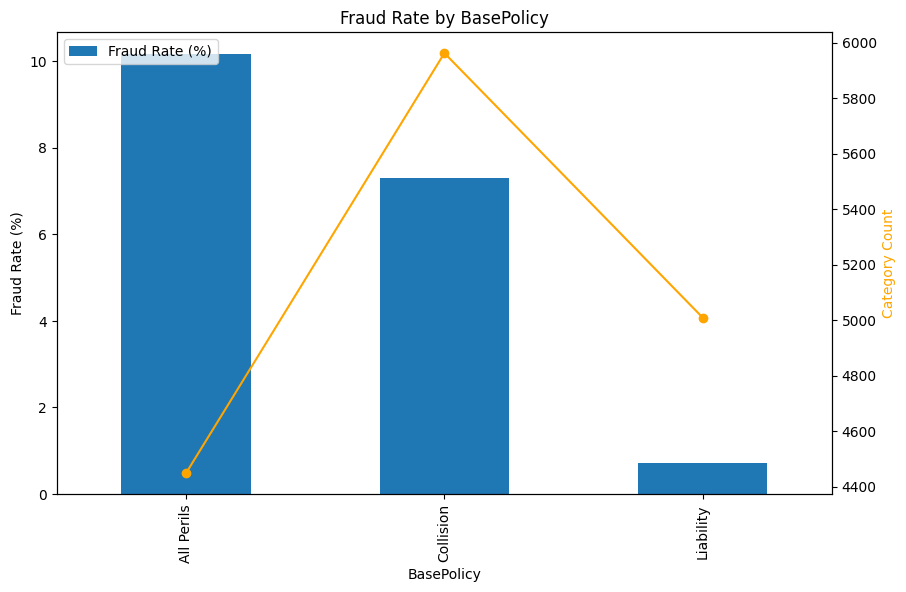

In [19]:
import pandas as pd
import matplotlib.pyplot as plt


# Function to calculate fraud rate for categorical features considering class imbalance
def plot_fraud_rate_with_balance(csv_data, column):
    # Calculate the fraud rate for each category
    fraud_rate = csv_data.groupby(column)['FraudFound'].value_counts(normalize=True).unstack().iloc[:, 1] * 100
    
    # Get the count of records in each category for context
    category_counts = csv_data[column].value_counts()
    
    # Create a new DataFrame to store both fraud rates and category counts
    fraud_rate_df = pd.DataFrame({
        'Fraud Rate (%)': fraud_rate,
        'Category Count': category_counts
    })
    
    # Plot the fraud rate with category count
    ax = fraud_rate_df['Fraud Rate (%)'].plot(kind='bar', figsize=(10, 6), title=f'Fraud Rate by {column}')
    
    # Add a secondary y-axis to show category counts
    ax2 = ax.twinx()
    ax2.plot(fraud_rate_df.index, fraud_rate_df['Category Count'], color='orange', marker='o', label='Category Count')
    ax2.set_ylabel('Category Count', color='orange')
    
    ax.set_ylabel('Fraud Rate (%)')
    ax.set_xlabel(column)
    ax.legend(loc='upper left')
    plt.show()

# List of categorical columns you want to analyze
categorical_columns = ['AccidentArea', 'Make', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'BasePolicy']

# Loop through the categorical columns and plot fraud rate with class imbalance consideration
for col in categorical_columns:
    plot_fraud_rate_with_balance(csv_data, col)

In [20]:
import numpy as np

# Load GloVe embeddings (300-dimensional)
def load_glove_model(glove_file):
    glove_model = {}
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            glove_model[word] = vector
    return glove_model

# Path to the GloVe file
glove_file = 'glove.6B.300d.txt'
glove_model = load_glove_model(glove_file)

print("GloVe model loaded successfully.")

GloVe model loaded successfully.


In [21]:
def sentence_to_vector(sentence, glove_model):
    """
    Converts a sentence into a vector by averaging the GloVe word vectors.
    """
    words = sentence.split()  # Split sentence into words
    word_vectors = []
    
    for word in words:
        # If the word exists in the GloVe model, use its vector
        if word in glove_model:
            word_vectors.append(glove_model[word])
        else:
            # If the word isn't in GloVe, append a zero vector
            word_vectors.append(np.zeros(300))  # 300 is the GloVe vector size
    
    # Average the word vectors
    if len(word_vectors) > 0:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(300)  # If the sentence is empty or no words found


In [22]:
benefit_columns = ['Benefit1', 'Benefit2', 'Benefit3', 'Benefit4', 'Benefit5']

for col in benefit_columns:
    # Apply the sentence_to_vector function to each sentence in the column
    df[col + '_Vector'] = df[col].apply(lambda x: sentence_to_vector(str(x), glove_model))

# Check the result
print(df.head())


  Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0   Dec            5  Wednesday   Honda        Urban          Tuesday   
1   Jan            3  Wednesday   Honda        Urban           Monday   
2   Oct            5     Friday   Honda        Urban         Thursday   
3   Jun            2   Saturday  Toyota        Rural           Friday   
4   Jan            5     Monday   Honda        Urban          Tuesday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  \
0          Jan                   1  Female        Single  ...   
1          Jan                   4    Male        Single  ...   
2          Nov                   2    Male       Married  ...   
3          Jul                   1    Male       Married  ...   
4          Feb                   2  Female        Single  ...   

                                            Benefit1  \
0        Offers roadside assistance for emergencies.   
1  Provides coverage for medical expenses for you...   
2 

In [23]:
# Save the updated dataframe with the new vector columns
df.to_csv('carclaims_with_glove_vectors.csv', index=False)

print("File saved as 'carclaims_with_glove_vectors.csv'.")

File saved as 'carclaims_with_glove_vectors.csv'.


In [24]:
# Drop the original benefit columns (Benefit1 to Benefit5)
df = df.drop(columns=['Benefit1', 'Benefit2', 'Benefit3', 'Benefit4', 'Benefit5'])

# Check the first few rows to confirm the columns were dropped
print(df.head())

  Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0   Dec            5  Wednesday   Honda        Urban          Tuesday   
1   Jan            3  Wednesday   Honda        Urban           Monday   
2   Oct            5     Friday   Honda        Urban         Thursday   
3   Jun            2   Saturday  Toyota        Rural           Friday   
4   Jan            5     Monday   Honda        Urban          Tuesday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  NumberOfCars  \
0          Jan                   1  Female        Single  ...        3 to 4   
1          Jan                   4    Male        Single  ...     1 vehicle   
2          Nov                   2    Male       Married  ...     1 vehicle   
3          Jul                   1    Male       Married  ...     1 vehicle   
4          Feb                   2  Female        Single  ...     1 vehicle   

   Year BasePolicy FraudFound                    Policy  \
0  1994  Liability         

In [25]:
# Save the updated DataFrame without the original benefit columns
df.to_csv('carclaims_without_benefits.csv', index=False)

print("The file has been updated and saved as 'carclaims_without_benefits.csv'.")

The file has been updated and saved as 'carclaims_without_benefits.csv'.
